<a href="https://colab.research.google.com/github/Mariam-Nazlawy/Image-Compression/blob/main/Colored_image_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Load the image and convert it to a NumPy array:

(800, 800, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

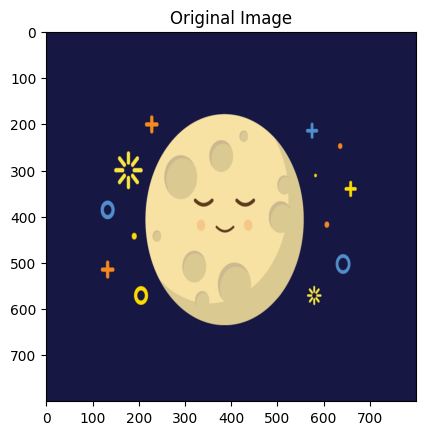

In [127]:
image = Image.open('moon.png')
resized_image = image.resize((800, 800))
image_array = np.array(resized_image)
print(image_array.shape)
plt.imshow(resized_image)
plt.title("Original Image")
plt.show

## Split the image into three channels (RGB):

In [128]:
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

## Calculate the mean of each channel:

In [129]:
red_mean = np.mean(red_channel)
green_mean = np.mean(green_channel)
blue_mean = np.mean(blue_channel)

## Center the data by subtracting the mean from each channel:

In [130]:
centered_red = red_channel - red_mean
centered_green = green_channel - green_mean
centered_blue = blue_channel - blue_mean

## Calculate the covariance matrix for each channel:

In [131]:
red_covariance = np.cov(centered_red)
green_covariance = np.cov(centered_green)
blue_covariance = np.cov(centered_blue)

## Calculate the eigenvalues and eigenvectors for each covariance matrix:

In [132]:
red_eigenvalues, red_eigenvectors = np.linalg.eig(red_covariance)
green_eigenvalues, green_eigenvectors = np.linalg.eig(green_covariance)
blue_eigenvalues, blue_eigenvectors = np.linalg.eig(blue_covariance)


Sort the eigenvalues in descending order and select the top n principal components:

In [133]:
# Choose the number of principal components to keep
k = 1000

# Sort the eigenvalues in descending order
red_eigenvalues_sorted = red_eigenvalues[::-1]
green_eigenvalues_sorted = green_eigenvalues[::-1]
blue_eigenvalues_sorted = blue_eigenvalues[::-1]

# Select the top n principal components
red_principal_components = red_eigenvectors[:, :k]
green_principal_components = green_eigenvectors[:, :k]
blue_principal_components = blue_eigenvectors[:, :k]


## Transform the data to the principal component space:

In [134]:
red_transformed = np.dot(centered_red, red_principal_components)
green_transformed = np.dot(centered_green, green_principal_components)
blue_transformed = np.dot(centered_blue, blue_principal_components)

## Merge and Save the transformed/compressed image

In [135]:
transformed = np.dstack((red_transformed, green_transformed, blue_transformed))
Image.fromarray(transformed.astype(np.uint8)).save('transformed_image.jpg')
transformed = Image.open('transformed_image.jpg')

## Visualize the transformed/compressed image

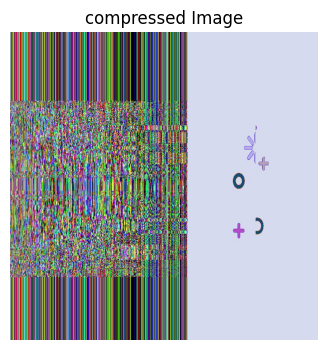

In [136]:
plt.figure(figsize=(8, 4))
plt.imshow(transformed)
plt.title('compressed Image')
plt.axis('off')
plt.show()

## Reconstruct the image from the principal components:

In [137]:
red_reconstructed = np.dot(red_transformed, red_principal_components.T) + red_mean
green_reconstructed = np.dot(green_transformed, green_principal_components.T) + green_mean
blue_reconstructed = np.dot(blue_transformed, blue_principal_components.T) + blue_mean

## Merge the reconstructed channels back into a single image:

In [138]:
reconstructed_image = np.dstack((red_reconstructed, green_reconstructed, blue_reconstructed))


## Save the reconstructed image:

In [139]:
Image.fromarray(reconstructed_image.astype(np.uint8)).save('compressed_image.jpg')


## Visualize the reconstructed/decompressed image

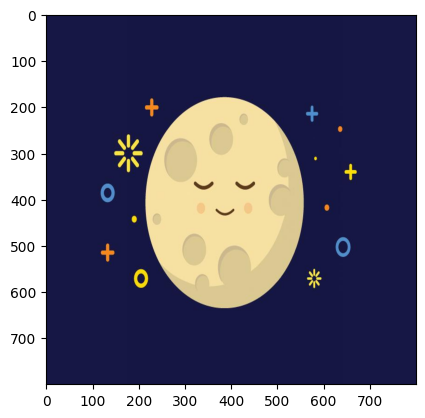

In [140]:
decompressed_image = Image.open('compressed_image.jpg')
plt.imshow(decompressed_image)
plt.show()